#Formative Assessment: Unsupervised Learning


Objective:
The objective of this assessment is to evaluate your understanding and ability to apply clustering techniques to a real-world dataset.

Dataset
Use the Iris dataset available in the sklearn library.


#1. Loading and Preprocessing (1 marks)

Load the Iris dataset from sklearn.
Drop the species column since this is a clustering problem.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans,AgglomerativeClustering
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram,linkage

In [4]:
#load the iris dataset
iris = load_iris()
data = pd.DataFrame(data=iris.data,columns=iris.feature_names)


# Drop the species column (not needed for clustering)
# Since the dataset does not include the species in the loaded data, we just use the features.
# species = pd.Series(iris.target, name='species')  # This line would add the species if needed
# data['species'] = species

#display the first few rows of the dataframe

print(data.head())
print(data.columns) #prints name of columns


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


#2.Clustering Algorithm Implementation

Implement the following two clustering algorithms:


##  KMeans Clustering 


KMeans clustering is an iterative algorithm that partitions a dataset into K distinct clusters. Here’s how it works:

Initialization: Randomly select K initial centroids from the dataset.

Assignment Step: Assign each data point to the nearest centroid, forming K clusters.

Update Step: Calculate the new centroids by taking the mean of all data points in each cluster.

Convergence: Repeat the assignment and update steps until the centroids no longer change significantly or a maximum number of iterations is reached.


Suitability for the Iris Dataset
KMeans clustering is suitable for the Iris dataset because:

Distinct Features: The Iris dataset consists of four continuous features that can be effectively used to find clusters.

Natural Clusters: There are known natural clusters (species) in the dataset, which KMeans can help to uncover based on the feature similarities.

Simplicity: The dataset is small and well-structured, making it ideal for the KMeans algorithm, which performs well with fewer dimensions and moderate data sizes.



KMeans(n_clusters=3, random_state=42)


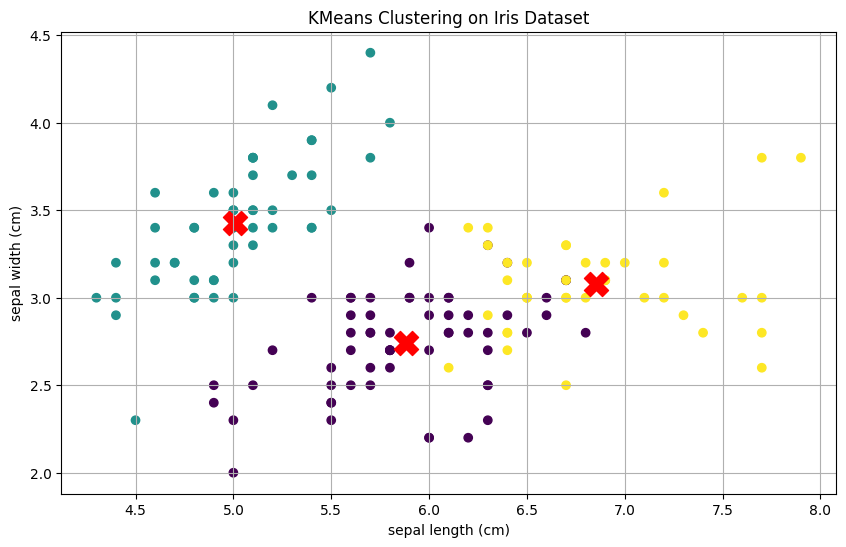

In [13]:
#Apply KMeans clustering

kmeans = KMeans(n_clusters=  3,random_state=42) #Assuming 3 clusters for the 3 species
data['cluster'] = kmeans.fit_predict(data)
print(kmeans)
#visualise the clusers(using the first 2 features for 2D visualisation)
plt.figure(figsize=(10,6))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=data['cluster'], cmap='viridis', marker='o')

#data.iloc[:, 0]: This selects all rows (:) of the first column (index 0) of the data DataFrame.
#  In the Iris dataset, this corresponds to the first feature, which is typically the sepal length.

#data.iloc[:, 1]: Similar to the previous part, this selects all rows of the second column (index 1) of the data DataFrame,
#  which corresponds to the second feature (sepal width).

#c=data['cluster']: This argument specifies the colors of the points in the scatter plot based on the values in the 'cluster' column. 
# Each unique cluster assigned by KMeans will be represented by a different color.

#cmap='viridis': This specifies the colormap to be used for coloring the points. The 'viridis' colormap is a perceptually
#  uniform colormap that is often preferred for visualizations because it is colorblind-friendly and looks good in print.

#marker='o': This defines the shape of the markers used for each point in the scatter plot. In this case, 'o' specifies circular markers.


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X')  # Centroids

#kmeans.cluster_centers_[:, 0]: This selects the x-coordinates (the first feature) of the cluster centroids.
#  The kmeans.cluster_centers_ attribute contains the coordinates of the centroids for each cluster, and [:, 0] accesses the first column.

#kmeans.cluster_centers_[:, 1]: This selects the y-coordinates (the second feature) of the cluster centroids, 
# accessing the second column of the centroid coordinates.

#s=300: This argument sets the size of the markers for the centroids. A larger size (300) makes the centroids more visible on the plot

#marker='X': This defines the shape of the centroid markers. An 'X' marker shape makes the centroids stand out more 
# compared to the circular markers used for the data points.
plt.title('KMeans Clustering on Iris Dataset')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.grid()
plt.show()


# Hierarchical Clustering

Provide a brief description of how Hierarchical clustering works.
Explain why Hierarchical clustering might be suitable for the Iris dataset.
Apply Hierarchical clustering to the preprocessed Iris dataset and visualize the clusters.

Hierarchical clustering is a method of cluster analysis that seeks to build a hierarchy of clusters. There are two main approaches:

Agglomerative (Bottom-Up):

Starts with each data point as its own cluster.
Iteratively merges the two closest clusters based on a distance metric (e.g., Euclidean distance) until a desired number of clusters is achieved or all points are merged into a single cluster.
Divisive (Top-Down):

Starts with all data points in a single cluster and recursively splits them into smaller clusters.
Hierarchical clustering produces a dendrogram, a tree-like diagram that shows the arrangement of clusters based on their similarities.

Suitability for the Iris Dataset
Hierarchical clustering is suitable for the Iris dataset because:

Small Size: The dataset has only 150 samples, making it feasible to compute distances between all points without excessive computational cost.
Natural Grouping: The known species provide a basis for assessing the effectiveness of clustering, and the inherent structure in the data may be revealed through hierarchical relationships.
Dendrogram Visualization: The dendrogram helps visualize the clustering process and decide on the number of clusters based on the height at which clusters are merged.


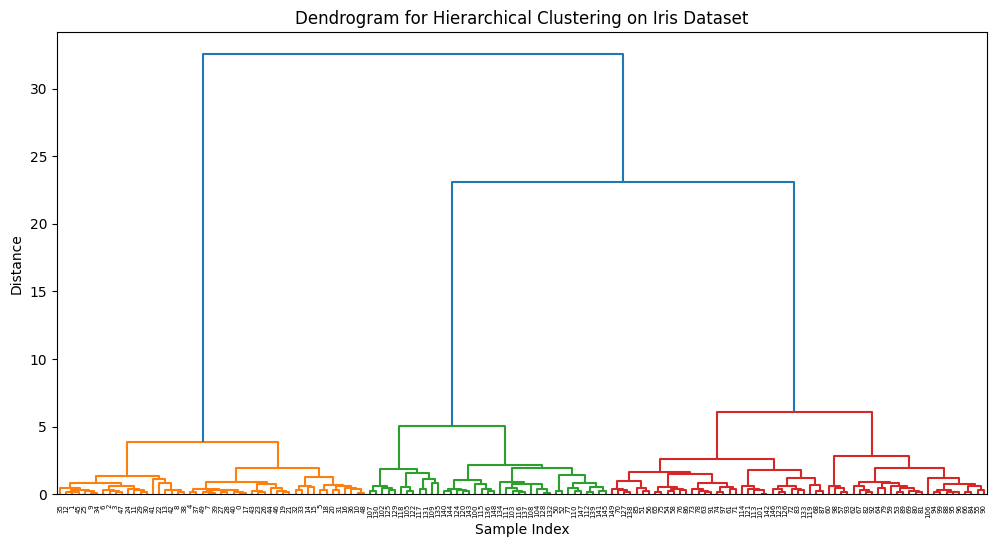

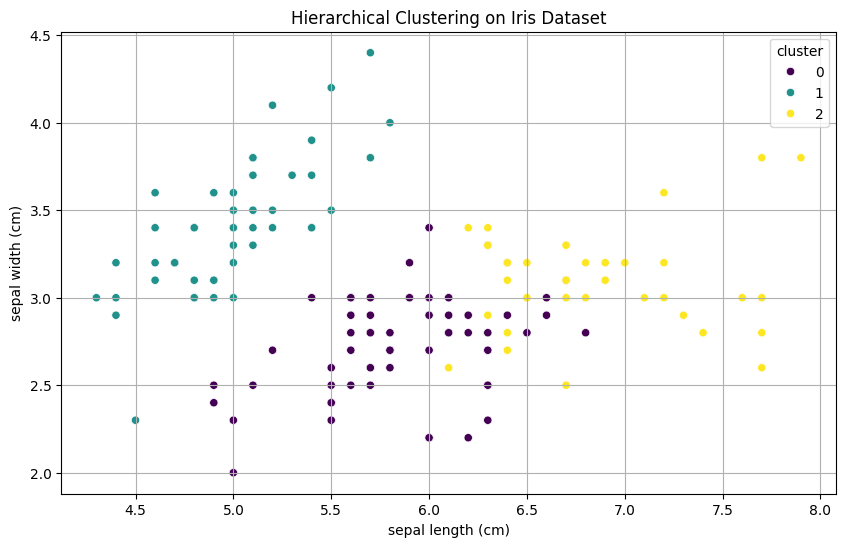

In [15]:
# Apply Agglomerative Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
data['cluster'] = hierarchical.fit_predict(data)

# Create a linkage matrix for the dendrogram
linkage_matrix = linkage(data, method='ward')

# Visualize the Dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, labels=data.index, leaf_rotation=90)
plt.title('Dendrogram for Hierarchical Clustering on Iris Dataset')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x=data.columns[0], y=data.columns[1], hue='cluster', palette='viridis', marker='o')
plt.title('Hierarchical Clustering on Iris Dataset')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.grid()
plt.show()

Hierarchical Clustering: The AgglomerativeClustering class is used to apply hierarchical clustering with 3 clusters. The resulting cluster labels are stored in the 'cluster' column.
Linkage Matrix: The linkage function computes the linkage matrix for the dendrogram using the "ward" method, which minimizes the variance within clusters.
Dendrogram Visualization: A dendrogram is created to visualize the hierarchical clustering process, showing how clusters are formed at different distance levels.
Cluster Visualization: Finally, a scatter plot is created to visualize the clusters formed by hierarchical clustering, using the first two features.
This process helps to analyze the clusters formed in the Iris dataset and understand their hierarchical relationships.